In [1]:
from fnn import *

### Test the output of a single Layer

 __Layer 0__<br>
input size = 2<br>
output size = 1<br>
input = [2,3] <br>
Weights = [0 1]<br>
Bias = 4<br>
Activation Function = Sigmoid<br>
expected out = sigmoid(7) = 0.999088948806<br>

Final output = 0.999088948806

In [2]:
l = Layers(2,1,0)
w = np.array([0,1])
b = 4
x = np.array([2,3])
l.setWeight(w)
l.setBias(b)
print(w.T @ x)
print(l.Weights)
print(l.bias)
print(l.evaluate(x,sigmoid))
print(sigmoid(7))

3
[0 1]
4
0.999088948806
0.999088948806


### Test the output of a 2-Layer FNN
Activation Function = Sigmoid <br>
__Layer 0__<br>
input size = 2<br>
output size = 2<br>
input = [2,3]<br>
weight = [[0,1],[1,0]]<br>
bias = [4,0]<br>
z = sigmoid([7,2])<br>
<br>
__Layer 1__ <br>
input size = 2<br>
output size = 1<br>
input = sigmoid([7,2])<br>
weight = [0,1]<br>
bias = 0<br>
expected = sigmoid(sigmoid(2)) = 0.706987368<br>

Final output = 0.706987368<br>

In [3]:
input_size = 2
x = np.array([2,3])
w_1 = np.array([[0,1],[1,0]])
b_1 = np.array([4,0])
w_2 = np.array([0,1])
b_2 = 0
test_FNN = FNN(input_size)
test_FNN.addLayer(2,2)
test_FNN.addLayer(2,1)
test_FNN.layer_list[0].setWeight(w_1)
test_FNN.layer_list[0].setBias(b_1)
test_FNN.layer_list[1].setWeight(w_2)
test_FNN.layer_list[1].setBias(b_2)
print(sigmoid(sigmoid(2)))
print(test_FNN.feed(x,sigmoid))
del test_FNN

0.706987368
0.706987368


### Test the output of the Quadratic cost function
z = [1,0,0,1]<br>
z_label = [1,1,0,1]<br>
expected = 0.25*((1-1)^2+(1-0)^2+(0-0)^2+(1-1)^2) = 0.25 <25>

final output = 0.25

In [4]:
from util import *
z = np.array([1,0,0,1])
z_label = np.array([1,1,0,1])
cost_quadratic(z,z_label)

0.25

### Traninig a simple FNN 

In [25]:
import matplotlib.pyplot as plt
x = np.array([[-2,-1],[25,6],[17,4],[-15,-6]])
y = np.array([1,0,0,1])
alpha = 0.1
FNN_2 = FNN(2)
FNN_2.addLayer(2,2)
FNN_2.addLayer(2,1)
FNN_2.train(alpha,x,y,dc_dz = dquadratic_dz,batches = 4)
test_set = np.array([[-3,-4],[-6,-1],[2,3],[20,0],[-16,2]])
test_z = np.array([1,1,0,0,1])
predict = []
for x in test_set:
    predict.append(FNN_2.predict(x,sigmoid))
print(predict)
print(cost_quadratic(np.array(predict),test_z))

[array([ 0.96285619]), array([ 0.96384835]), array([ 0.07647689]), array([ 0.05605059]), array([ 0.96389972])]
0.433286131126


### Check the the results of back propagation argee with the finite difference

In [13]:
def quadratic(z,answer):
    return (answer-z)**2
#### Back propagation
def back_propagation(fnn,x,y):
    fnn.feed(x,sigmoid)
    delta_list = {}
    weights_gradients = []
    bias_gradients = []
    for i in range(len(fnn.layer_list)-1,-1,-1):
        if i == len(fnn.layer_list)-1:
            delta = dquadratic_dz(fnn.layer_list[i].z,y) * d_sigmoid(fnn.layer_list[i].y)
            delta_list[i] = delta
            #delta = dquadratic_dz(l.z,y) * d_sigmoid(l.y)
        else:
            print('hh')
            delta = (delta_list[i+1] * fnn.layer_list[i+1].Weights.T) @ d_sigmoid(fnn.layer_list[i].y)
            delta_list[i] = delta
        weights_gradient = np.outer(fnn.layer_list[i].x,delta)
        bias_gradient = delta
        weights_gradients.append(weights_gradient)
        bias_gradients.append(bias_gradient)
    return weights_gradients,bias_gradients
#### Finite Difference
def finite_diff(fnn,x,y):
    fnn.feed(x,sigmoid)
    w = fnn.layer_list[0].Weights
    b = fnn.layer_list[0].bias
    x = fnn.layer_list[0].x
    bias_gradients = (quadratic(sigmoid(w.T @ x + (b+0.0001)),y) - quadratic(sigmoid(w.T @x + b),y))/0.0001
    weight_gradient = []
    for i in range(len(w)):
        preturbed_w = w.copy()
        preturbed_w[i] += 0.0001
        weight_gradient.append((quadratic(sigmoid((preturbed_w.T @ x + b)),y) - quadratic(sigmoid(w.T @ x + b),y))/0.0001)
    return weights_gradients,bias_gradients


In [14]:
### Initialize Weights&Bias
w = np.array([[-1,1],[1,-1]],dtype = 'float')
b = np.array([2,2])

In [15]:
f1 = FNN(2)
f1.addLayer(2,2)
f1.layer_list[0].setWeight(w)
f1.layer_list[0].setBias(b)
x = np.array([-1,1])
y = np.array([0,1])
weights_gradients,bias_gradients = back_propagation(f1,x,y)
del f1
print("<--Back Propagation-->")
print("Weights gradients:{}".format(weights_gradients))
print("Bias gradients:{}".format(bias_gradients))
f1 = FNN(2)
f1.addLayer(2,2)
f1.layer_list[0].setWeight(w)
f1.layer_list[0].setBias(b)
weights_gradients,bias_gradients = finite_diff(f1,x,y)
print('\n')
print("<--Finite Difference-->")
print("Weights gradients:{}".format(weights_gradients))
print("Bias gradients:{}".format(bias_gradients))
del f1

<--Back Propagation-->
Weights gradients:[array([[-0.03469004,  0.25      ],
       [ 0.03469004, -0.25      ]])]
Bias gradients:[array([ 0.03469004, -0.25      ])]


<--Finite Difference-->
Weights gradients:[array([[-0.03469004,  0.25      ],
       [ 0.03469004, -0.25      ]])]
Bias gradients:[ 0.0346884  -0.24999375]


# Traning Ising 

In [1]:
from fnn import *

In [2]:
### Read train_data file
url = 'Ising/'
file = open(url+'train_data.txt').readlines()
train_dataset = np.zeros([10000,100])
i = 0 
for line in file:
    line = line.split()
    for j in range(len(line)):
        train_dataset[i][j] = int(line[j])
    i+=1
file = open(url+'train_label.txt').readlines()
train_labelset = np.zeros([10000,1])
i = 0
for line in file:
    line = line.split()
    for j in range(len(line)):
        train_labelset[i][j] = int(line[j])
    i+=1

In [ ]:
###Read Test file
url = 'Ising/'
file = open(url+'test_data.txt').readlines()
test_dataset = np.zeros([10000,100])
i = 0 
for line in file:
    line = line.split()
    for j in range(len(line)):
        test_dataset[i][j] = int(line[j])
    i+=1
file = open(url+'test_label.txt').readlines()
test_labelset = np.zeros([10000,1])
i = 0
for line in file:
    line = line.split()
    for j in range(len(line)):
        test_labelset[i][j] = int(line[j])
    i+=1

In [197]:
###Initialize a 2-Layer Feedforward Network with n1 = 100, m1 = 100 & n2 = 100, m2 =1
Ising_FNN = FNN(100)
Ising_FNN.addLayer(100,100)
Ising_FNN.addLayer(100,1)
w_1 = np.zeros([100,100])
w_2 = np.zeros([100,1])
b_1 = np.zeros(100)
b_2 = np.random.uniform(-0.01,0.01)
for i in range(100):
    w_2[i] = np.random.uniform(-0.01,0.01)
    for j in range(100):
        w_1[i,j] = np.random.uniform(-0.01,0.01)
Ising_FNN.layer_list[0].setWeight(w_1)
Ising_FNN.layer_list[0].setBias(b_1)
Ising_FNN.layer_list[1].setWeight(w_2)
Ising_FNN.layer_list[1].setBias(b_2)
alpha = 0.1

In [198]:
###Train Model
Ising_FNN.train(alpha,train_dataset,train_labelset,dc_dz = dcross_dz, batches = 10000,epoches = 100)

In [199]:
### Check predictions against test file
import collections
accuracy = collections.Counter()
accuracy['match'] = 0
accuracy['fail'] = 0
predict_z = []
for  test_data,test_label in zip(test_dataset,test_labelset):
    predict = Ising_FNN.predict(test_data,sigmoid)
    predict_z.append(predict)
    if(-0.5 <test_label - predict < 0.5):
        accuracy['match'] += 1
    else:
        accuracy['fail'] += 1
print(accuracy)
print(accuracy['match']/len(test_dataset))

Counter({'match': 8698, 'fail': 1302})
0.8698


In [154]:
### Read test_betaJ file
file = open(url+'test_betaJ.txt').readlines()
test_betaJ = []
i = 0
for line in file:
    line = line.split()
    for j in range(len(line)):
        test_betaJ.append(float(line[j]))
    i+=1

10000


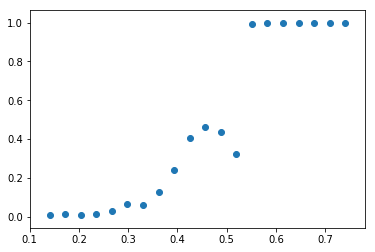

In [155]:
### average out the predicted M value for given betaJ
import matplotlib.pyplot as plt
import statistics
mapping = {}
print(len(test_betaJ))
for betaJ,predict in zip(list(test_betaJ),list(predict_z)):
    if betaJ not in mapping:
        mapping[betaJ] = [float(predict)]
    mapping[betaJ].append(float(predict))
avg = []
for betaJ in mapping.keys():
    avg.append(statistics.mean(mapping[betaJ]))
plt.scatter(mapping.keys(),avg) 
plt.show()